In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("/home/gabriel/Documents/Curso Tensorflow/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/gabriel/Documents/Curso Tensorflow/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/gabriel/Documents/Curso Tensorflow/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/gabriel/Documents/Curso Tensorflow/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /home/gabriel/Documents/Curso Tensorflow/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
tf.reset_default_graph()

In [4]:
# 784 (28x28)
num_inputs = 784
# 392
neurons_hid1 = 392
# 196
neurons_hid2 = 196
# 392
neurons_hid3 = neurons_hid1
# 784
num_outputs = num_inputs

In [5]:
learning_rate = 0.01

In [6]:
actf = tf.nn.relu

In [7]:
X = tf.placeholder(tf.float32, shape=[None,num_inputs])

In [8]:
initializer = tf.variance_scaling_initializer()

In [9]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1], dtype=tf.float32))
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2], dtype=tf.float32))
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3], dtype=tf.float32))
w4 = tf.Variable(initializer([neurons_hid3, num_outputs], dtype=tf.float32))

In [10]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [11]:
hid_layer1 = actf(tf.matmul(X,w1) + b1)
hid_layer2 = actf(tf.matmul(hid_layer1,w2) + b2)
hid_layer3 = actf(tf.matmul(hid_layer2,w3) + b3)
output_layer = actf(tf.matmul(hid_layer3,w4) + b4)

In [12]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [13]:
opt = tf.train.AdamOptimizer(learning_rate)

In [14]:
train = opt.minimize(loss)

In [15]:
init = tf.global_variables_initializer()

In [16]:
saver = tf.train.Saver()

In [17]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batchs = mnist.train.num_examples // batch_size
        
        for iterations in range(num_batchs):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:X_batch})
        
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch, training_loss))
        
    saver.save(sess, './example_stacked_autoencoder.ckpt')

EPOCH: 0 LOSS: 0.029522277414798737
EPOCH: 1 LOSS: 0.025780608877539635
EPOCH: 2 LOSS: 0.02473500929772854
EPOCH: 3 LOSS: 0.02478908561170101
EPOCH: 4 LOSS: 0.02412613481283188


In [18]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess, './example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


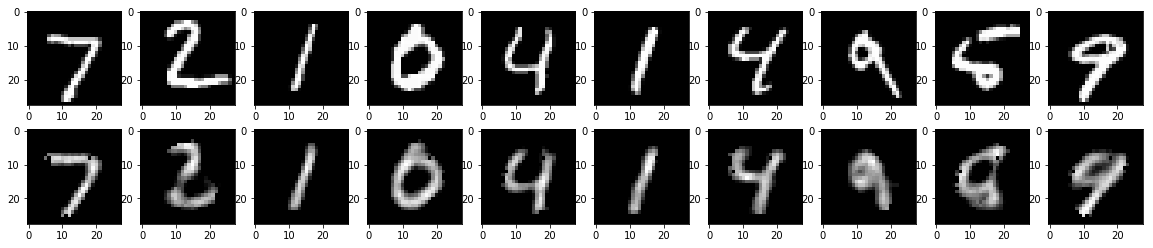

In [27]:
f, a = plt.subplots(2,10, figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)), cmap='gray')
    a[1][i].imshow(np.reshape(results[i], (28,28)), cmap='gray')